<a href="https://colab.research.google.com/github/hungnguyenvinh311/Python-Assignment-01/blob/main/B%C3%A0i_t%E1%BA%ADp_l%E1%BB%9Bn_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 33.5 MB/s eta 0:00:00


Exercise 1

1.Collect statistical data for all players who have played more than 90 minutes in the 2024-2025 English Premier League season.

2.Data source: https://fbref.com/en/

3.Save the result to a file named 'results.csv'








In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup, Comment
import pandas as pd
import time

def init_driver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    driver = webdriver.Chrome(options=chrome_options)
    return driver

urls = {
    "standard": ("https://fbref.com/en/comps/9/stats/Premier-League-Stats", "stats_standard"),
    "keepers": ("https://fbref.com/en/comps/9/keepers/Premier-League-Stats", "stats_keeper"),
    "shooting": ("https://fbref.com/en/comps/9/shooting/Premier-League-Stats", "stats_shooting"),
    "passing": ("https://fbref.com/en/comps/9/passing/Premier-League-Stats", "stats_passing"),
    "gca": ("https://fbref.com/en/comps/9/gca/Premier-League-Stats", "stats_gca"),
    "defense": ("https://fbref.com/en/comps/9/defense/Premier-League-Stats", "stats_defense"),
    "possession": ("https://fbref.com/en/comps/9/possession/Premier-League-Stats", "stats_possession"),
    "misc": ("https://fbref.com/en/comps/9/misc/Premier-League-Stats", "stats_misc")
}

def get_stats_table_selenium(driver, url, table_id):
    driver.get(url)
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    comments = soup.find_all(string=lambda text: isinstance(text, Comment))

    for comment in comments:
        if table_id in comment:
            comment_soup = BeautifulSoup(comment, 'html.parser')
            table = comment_soup.find("table", {"id": table_id})
            if table:
                df = pd.read_html(str(table))[0]
                df = df[df[df.columns[0]] != df.columns[0]]
                return df
    print(f"❌ Không tìm thấy bảng với id='{table_id}' trong {url}")
    return None

driver = init_driver()
all_stats = {}

for key, (url, table_id) in urls.items():
    print(f"🔍 Đang thu thập {key}...")
    df = get_stats_table_selenium(driver, url, table_id)
    if df is not None:
        all_stats[key] = df
        print(f"✅ Thu thập xong {key}, {len(df)} dòng.")
    else:
        print(f"⚠️ Không thể thu thập dữ liệu {key}.")

driver.quit()

🔍 Đang thu thập standard...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong standard, 590 dòng.
🔍 Đang thu thập keepers...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong keepers, 44 dòng.
🔍 Đang thu thập shooting...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong shooting, 590 dòng.
🔍 Đang thu thập passing...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong passing, 590 dòng.
🔍 Đang thu thập gca...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong gca, 590 dòng.
🔍 Đang thu thập defense...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong defense, 590 dòng.
🔍 Đang thu thập possession...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong possession, 590 dòng.
🔍 Đang thu thập misc...


<ipython-input-3-a14e996539f1>:37: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Thu thập xong misc, 590 dòng.


In [6]:
for key in all_stats.keys():
    all_stats[key].columns = [' | '.join(col) if isinstance(col, tuple) else
                              col for col in all_stats[key].columns]
    print(all_stats[key].columns)

Index(['Unnamed: 0_level_0 | Rk', 'Unnamed: 1_level_0 | Player',
       'Unnamed: 2_level_0 | Nation', 'Unnamed: 3_level_0 | Pos',
       'Unnamed: 4_level_0 | Squad', 'Unnamed: 5_level_0 | Age',
       'Unnamed: 6_level_0 | Born', 'Playing Time | MP',
       'Playing Time | Starts', 'Playing Time | Min', 'Playing Time | 90s',
       'Performance | Gls', 'Performance | Ast', 'Performance | G+A',
       'Performance | G-PK', 'Performance | PK', 'Performance | PKatt',
       'Performance | CrdY', 'Performance | CrdR', 'Expected | xG',
       'Expected | npxG', 'Expected | xAG', 'Expected | npxG+xAG',
       'Progression | PrgC', 'Progression | PrgP', 'Progression | PrgR',
       'Per 90 Minutes | Gls', 'Per 90 Minutes | Ast', 'Per 90 Minutes | G+A',
       'Per 90 Minutes | G-PK', 'Per 90 Minutes | G+A-PK',
       'Per 90 Minutes | xG', 'Per 90 Minutes | xAG',
       'Per 90 Minutes | xG+xAG', 'Per 90 Minutes | npxG',
       'Per 90 Minutes | npxG+xAG', 'Unnamed: 36_level_0 | Matches'],


In [7]:
for key in all_stats.keys():
  print(all_stats[key].shape)

(590, 37)
(44, 27)
(590, 26)
(590, 32)
(590, 25)
(590, 25)
(590, 31)
(590, 25)


In [8]:
print(all_stats.keys())


dict_keys(['standard', 'keepers', 'shooting', 'passing', 'gca', 'defense', 'possession', 'misc'])


In [9]:
all_stats['standard']['Unnamed: 1_level_0 | Player'].value_counts()

,count
Unnamed: 1_level_0 | Player,
Player,22
Jordan Ayew,2
Marcus Rashford,2
Joachim Andersen,2
Odsonne Édouard,2
...,...
Michael Golding,1
João Gomes,1
Rodrigo Gomes,1


In [10]:
from functools import reduce

processed_dfs = []

for idx, (key, df) in enumerate(all_stats.items()):
    df.columns = ['_'.join(col) if isinstance(col, tuple) else col for col in df.columns]

    player_col = next((col for col in df.columns if "Player" in col), None)
    if player_col is None:
        print(f"⚠️ Bảng '{key}' không có cột Player.")
        continue

    df = df.rename(columns={player_col: "Player"})

    df = df.rename(columns={col: f"{key}_{col}" for col in df.columns if col != "Player"})

    df = df.drop_duplicates(subset="Player")

    processed_dfs.append(df)

if processed_dfs:
    merged_df = reduce(lambda left, right: pd.merge(left, right, on="Player", how="outer"), processed_dfs)
else:
    print("❌ Không có DataFrame nào hợp lệ để gộp.")




In [11]:
merged_df.columns

Index(['standard_Unnamed: 0_level_0 | Rk', 'Player',
       'standard_Unnamed: 2_level_0 | Nation',
       'standard_Unnamed: 3_level_0 | Pos',
       'standard_Unnamed: 4_level_0 | Squad',
       'standard_Unnamed: 5_level_0 | Age',
       'standard_Unnamed: 6_level_0 | Born', 'standard_Playing Time | MP',
       'standard_Playing Time | Starts', 'standard_Playing Time | Min',
       ...
       'misc_Performance | Int', 'misc_Performance | TklW',
       'misc_Performance | PKwon', 'misc_Performance | PKcon',
       'misc_Performance | OG', 'misc_Performance | Recov',
       'misc_Aerial Duels | Won', 'misc_Aerial Duels | Lost',
       'misc_Aerial Duels | Won%', 'misc_Unnamed: 24_level_0 | Matches'],
      dtype='object', length=221)

In [12]:
merged_df['standard_Unnamed: 5_level_0 | Age'].dtype

dtype('O')

In [13]:
merged_df['standard_Unnamed: 5_level_0 | Age'] = merged_df['standard_Unnamed: 5_level_0 | Age'].apply(
    lambda x: int(x.split('-')[0].strip()) if isinstance(x, str) and '-' in x else x)

merged_df['standard_Unnamed: 5_level_0 | Age']


,standard_Unnamed: 5_level_0 | Age
0,35
1,26
2,27
3,32
4,21
...,...
552,28
553,19
554,31
555,34


In [14]:
feat = ['Player',
        'standard_Unnamed: 2_level_0 | Nation',
        'standard_Unnamed: 3_level_0 | Pos',
        'standard_Unnamed: 4_level_0 | Squad',
        'standard_Unnamed: 5_level_0 | Age',
        'standard_Playing Time | MP',
        'standard_Playing Time | Starts',
        'standard_Playing Time | Min',
        'standard_Performance | Gls',
        'standard_Performance | Ast',
        'standard_Performance | CrdY',
        'standard_Performance | CrdR',
        'standard_Expected | xG',
        'standard_Expected | xAG',
        'standard_Progression | PrgC',
        'standard_Progression | PrgP',
        'standard_Progression | PrgR',
        'standard_Per 90 Minutes | Gls',
        'standard_Per 90 Minutes | Ast',
        'standard_Per 90 Minutes | xG',
        'standard_Per 90 Minutes | xAG',
        'keepers_Performance | GA90',
        'keepers_Performance | Save%',
        'keepers_Performance | CS%',
        'keepers_Penalty Kicks | Save%',
        'shooting_Standard | SoT%',
        'shooting_Standard | SoT/90',
        'shooting_Standard | G/Sh',
        'shooting_Standard | Dist',
        'passing_Total | Cmp',
        'passing_Total | Cmp%',
        'passing_Total | TotDist',
        'passing_Short | Cmp%',
        'passing_Medium | Cmp%',
        'passing_Long | Cmp%',
        'passing_Unnamed: 26_level_0 | KP',
        'passing_Unnamed: 27_level_0 | 1/3',
        'passing_Unnamed: 28_level_0 | PPA',
        'passing_Unnamed: 29_level_0 | CrsPA',
        'passing_Unnamed: 30_level_0 | PrgP',
        'gca_SCA | SCA',
        'gca_SCA | SCA90',
        'gca_GCA | GCA',
        'gca_GCA | GCA90',
        'defense_Tackles | Tkl',
        'defense_Tackles | TklW',
        'defense_Challenges | Att',
        'defense_Challenges | Lost',
        'defense_Blocks | Blocks',
        'defense_Blocks | Sh',
        'defense_Blocks | Pass',
        'defense_Unnamed: 20_level_0 | Int',
        'possession_Touches | Touches',
        'possession_Touches | Def Pen',
        'possession_Touches | Def 3rd',
        'possession_Touches | Mid 3rd',
        'possession_Touches | Att 3rd',
        'possession_Touches | Att Pen',
        'possession_Take-Ons | Att',
        'possession_Take-Ons | Succ%',
        'possession_Take-Ons | Tkld%',
        'possession_Carries | Carries',
        'possession_Carries | PrgDist',
        'possession_Carries | PrgC',
        'possession_Carries | 1/3',
        'possession_Carries | CPA',
        'possession_Carries | Mis',
        'possession_Carries | Dis',
        'possession_Receiving | Rec',
        'possession_Receiving | PrgR',
        'misc_Performance | Fls',
        'misc_Performance | Fld',
        'misc_Performance | Off',
        'misc_Performance | Crs',
        'misc_Performance | Recov',
        'misc_Aerial Duels | Won',
        'misc_Aerial Duels | Lost',
        'misc_Aerial Duels | Won%']
len(feat)

78

In [15]:
def convert_to_number(value):
    if isinstance(value, (int, float)):
        return value
    if isinstance(value, str):
        try:
            if '.' in value:
                return float(value)
            else:
                return int(value)
        except ValueError:
            return None
    return None


for col in feat[4:]:
  merged_df[col] = merged_df[col].apply(convert_to_number)
  print(f"{col} __ {merged_df[col].dtypes}")

standard_Unnamed: 5_level_0 | Age __ float64
standard_Playing Time | MP __ float64
standard_Playing Time | Starts __ float64
standard_Playing Time | Min __ float64
standard_Performance | Gls __ float64
standard_Performance | Ast __ float64
standard_Performance | CrdY __ float64
standard_Performance | CrdR __ float64
standard_Expected | xG __ float64
standard_Expected | xAG __ float64
standard_Progression | PrgC __ float64
standard_Progression | PrgP __ float64
standard_Progression | PrgR __ float64
standard_Per 90 Minutes | Gls __ float64
standard_Per 90 Minutes | Ast __ float64
standard_Per 90 Minutes | xG __ float64
standard_Per 90 Minutes | xAG __ float64
keepers_Performance | GA90 __ float64
keepers_Performance | Save% __ float64
keepers_Performance | CS% __ float64
keepers_Penalty Kicks | Save% __ float64
shooting_Standard | SoT% __ float64
shooting_Standard | SoT/90 __ float64
shooting_Standard | G/Sh __ float64
shooting_Standard | Dist __ float64
passing_Total | Cmp __ float64
p

In [16]:
merged_df = merged_df[merged_df['standard_Playing Time | Min'] > 90]
merged_df['standard_Playing Time | Min'].value_counts()

,count
standard_Playing Time | Min,
3150.0,7
180.0,4
630.0,4
1744.0,3
540.0,3
...,...
783.0,1
1656.0,1
493.0,1


In [17]:
merged_df.sort_values(by='Player',ascending=True,inplace=True)
merged_df['Player']

,Player
0,Aaron Cresswell
1,Aaron Ramsdale
2,Aaron Wan-Bissaka
3,Abdoulaye Doucouré
4,Abdukodir Khusanov
...,...
550,Yukinari Sugawara
552,Yves Bissouma
554,Álex Moreno
555,İlkay Gündoğan


In [18]:
import re

clean_feat = [re.sub(r'_Unnamed: \d+_level_0', '', col) for col in feat]

merged_df.columns = [re.sub(r'_Unnamed: \d+_level_0', '', col) for col in merged_df.columns]



In [ ]:
merged_df[clean_feat].head()

,Player,standard | Nation,standard | Pos,standard | Squad,standard | Age,standard_Playing Time | MP,standard_Playing Time | Starts,standard_Playing Time | Min,standard_Performance | Gls,standard_Performance | Ast,...,possession_Receiving | Rec,possession_Receiving | PrgR,misc_Performance | Fls,misc_Performance | Fld,misc_Performance | Off,misc_Performance | Crs,misc_Performance | Recov,misc_Aerial Duels | Won,misc_Aerial Duels | Lost,misc_Aerial Duels | Won%
0,Aaron Cresswell,eng ENG,DF,West Ham,35.0,14.0,7.0,589.0,0.0,0.0,...,312.0,2.0,3.0,1.0,0.0,27.0,21.0,7.0,6.0,53.8
1,Aaron Ramsdale,eng ENG,GK,Southampton,26.0,26.0,26.0,2340.0,0.0,0.0,...,628.0,0.0,1.0,4.0,0.0,0.0,19.0,5.0,0.0,100.0
2,Aaron Wan-Bissaka,eng ENG,DF,West Ham,27.0,32.0,31.0,2794.0,2.0,2.0,...,1135.0,139.0,22.0,24.0,4.0,64.0,155.0,22.0,29.0,43.1
3,Abdoulaye Doucouré,ml MLI,MF,Everton,32.0,30.0,29.0,2425.0,3.0,1.0,...,705.0,91.0,46.0,5.0,10.0,23.0,139.0,29.0,43.0,40.3
4,Abdukodir Khusanov,uz UZB,DF,Manchester City,21.0,6.0,6.0,503.0,0.0,0.0,...,332.0,2.0,3.0,3.0,0.0,1.0,27.0,6.0,4.0,60.0


In [19]:
kep = ['keepers_Performance | GA90',
        'keepers_Performance | Save%',
        'keepers_Performance | CS%',
        'keepers_Penalty Kicks | Save%']

In [20]:
merged_df[kep] = merged_df[kep].fillna(0)


In [21]:
shoot = ['shooting_Standard | SoT%',
        'shooting_Standard | SoT/90',
        'shooting_Standard | G/Sh',
        'shooting_Standard | Dist']

In [22]:
mask = merged_df['standard | Pos'] == 'GK'
merged_df.loc[mask, shoot] = merged_df.loc[mask, shoot].fillna(0)

In [23]:
miss_val_col = []

for col in clean_feat:
  if merged_df[col].isna().sum() > 0:
    print(f"{col} __ {merged_df[col].isna().sum()}")
    miss_val_col.append(col)

shooting_Standard | SoT% __ 16
shooting_Standard | G/Sh __ 16
shooting_Standard | Dist __ 16
passing_Long | Cmp% __ 5
possession_Take-Ons | Succ% __ 40
possession_Take-Ons | Tkld% __ 40
misc_Aerial Duels | Won% __ 7


In [24]:
for col in miss_val_col:
  merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

In [ ]:
merged_df[clean_feat].to_csv('results1.csv', index=False)

Exercise 2

1. Identify the top 3 players with the highest and lowest scores for each statistic. Save result to a file name ‘top_3.txt’

2. Find the median for each statistic. Calculate the mean and standard deviation for each statistic across all players and for each team. Save the results to a file named 'results2.csv

3. Plot a histogram showing the distribution of each statistic for all players in the league and each team.

4. Identify the team with the highest scores for each statistic. Based on your analysis, which team do you think is performing the best in the 2024-2025 Premier League season?




In [ ]:
with open("top_3.txt", "w", encoding="utf-8") as file:
    for col in clean_feat[4:]:
        if col == 'Player':
            continue
        sorted_idx = merged_df[col].sort_values(ascending=False).index
        g = pd.DataFrame(merged_df.loc[sorted_idx[:3], ['Player', col]]).reset_index(drop=True)
        f = pd.DataFrame(merged_df.loc[sorted_idx[-3:], ['Player', col]]).reset_index(drop=True)
        g.index += 1
        f.index += 1

        file.write('---------------------------------------\n')
        file.write(f"Top 3 players with highest {col}:\n")
        file.write(g.to_string(index=True, header=False))
        file.write('\n')
        file.write(f"Top 3 players with lowest {col}:\n")
        file.write(f.to_string(index=True, header=False))
        file.write('\n')
        file.write('---------------------------------------\n\n')


In [25]:
clean_feat


['Player',
 'standard | Nation',
 'standard | Pos',
 'standard | Squad',
 'standard | Age',
 'standard_Playing Time | MP',
 'standard_Playing Time | Starts',
 'standard_Playing Time | Min',
 'standard_Performance | Gls',
 'standard_Performance | Ast',
 'standard_Performance | CrdY',
 'standard_Performance | CrdR',
 'standard_Expected | xG',
 'standard_Expected | xAG',
 'standard_Progression | PrgC',
 'standard_Progression | PrgP',
 'standard_Progression | PrgR',
 'standard_Per 90 Minutes | Gls',
 'standard_Per 90 Minutes | Ast',
 'standard_Per 90 Minutes | xG',
 'standard_Per 90 Minutes | xAG',
 'keepers_Performance | GA90',
 'keepers_Performance | Save%',
 'keepers_Performance | CS%',
 'keepers_Penalty Kicks | Save%',
 'shooting_Standard | SoT%',
 'shooting_Standard | SoT/90',
 'shooting_Standard | G/Sh',
 'shooting_Standard | Dist',
 'passing_Total | Cmp',
 'passing_Total | Cmp%',
 'passing_Total | TotDist',
 'passing_Short | Cmp%',
 'passing_Medium | Cmp%',
 'passing_Long | Cmp%',
 

In [26]:
len(clean_feat)

78

In [27]:
teams = merged_df['standard | Squad'].unique()
teams.sort()
teams

array(['Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford', 'Brighton',
       'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Ipswich Town',
       'Leicester City', 'Liverpool', 'Manchester City', 'Manchester Utd',
       'Newcastle Utd', "Nott'ham Forest", 'Southampton', 'Tottenham',
       'West Ham', 'Wolves'], dtype=object)

In [28]:
teams = ['all'] + list(teams)
teams

['all',
 'Arsenal',
 'Aston Villa',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Chelsea',
 'Crystal Palace',
 'Everton',
 'Fulham',
 'Ipswich Town',
 'Leicester City',
 'Liverpool',
 'Manchester City',
 'Manchester Utd',
 'Newcastle Utd',
 "Nott'ham Forest",
 'Southampton',
 'Tottenham',
 'West Ham',
 'Wolves']

In [29]:
rows = []

for team in teams:
    row = {'Team': team}

    for feat in clean_feat[4:]:
        if team == 'all':
            subset = merged_df[feat]
        else:
            subset = merged_df.loc[merged_df['standard | Squad'] == team, feat]

        merged_df.loc[merged_df['standard | Squad'] == team, feat]
        row[f"Median of {feat}"] = round(subset.median(), 2)
        row[f"Mean of {feat}"] = round(subset.mean(), 2)
        row[f"Std of {feat}"] = round(subset.std(), 2)

    rows.append(row)

metrics_df = pd.DataFrame(rows)

metrics_df.head()


,Team,Median of standard | Age,Mean of standard | Age,Std of standard | Age,Median of standard_Playing Time | MP,Mean of standard_Playing Time | MP,Std of standard_Playing Time | MP,Median of standard_Playing Time | Starts,Mean of standard_Playing Time | Starts,Std of standard_Playing Time | Starts,...,Std of misc_Performance | Recov,Median of misc_Aerial Duels | Won,Mean of misc_Aerial Duels | Won,Std of misc_Aerial Duels | Won,Median of misc_Aerial Duels | Lost,Mean of misc_Aerial Duels | Lost,Std of misc_Aerial Duels | Lost,Median of misc_Aerial Duels | Won%,Mean of misc_Aerial Duels | Won%,Std of misc_Aerial Duels | Won%
0,all,26.0,26.42,4.26,23.0,21.40,9.97,15.0,15.75,10.96,...,47.12,10.0,18.49,21.68,13.0,18.48,18.80,50.00,48.81,21.37
1,Arsenal,26.5,25.95,3.82,23.5,23.27,8.07,16.5,17.50,10.40,...,41.37,10.5,19.91,19.79,15.5,19.36,17.65,51.15,47.83,19.01
2,Aston Villa,27.0,26.70,4.13,21.0,19.78,10.36,11.0,14.11,11.72,...,37.03,8.0,12.85,12.20,10.0,14.07,14.12,50.00,41.77,23.31
3,Bournemouth,26.0,25.96,3.82,26.0,22.22,10.18,17.0,16.70,11.63,...,57.25,20.0,23.17,21.30,22.0,24.61,20.98,48.00,50.12,17.98
4,Brentford,24.0,25.67,3.86,28.0,23.52,11.38,21.0,18.33,13.30,...,55.45,12.0,27.52,31.92,14.0,23.95,23.96,55.50,54.89,19.61


In [ ]:
metrics_df.to_csv('result2.csv', index=False)


In [30]:
att_feat = ['shooting_Standard | SoT%', 'shooting_Standard | SoT/90', 'shooting_Standard | Dist']
def_feat = ['defense_Tackles | Tkl', 'defense_Tackles | TklW', 'defense_Challenges | Att']

<ipython-input-22-6a3a7de2f530>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax_row1, ax_row2) = plt.subplots(2, 3, figsize=(12, 6))


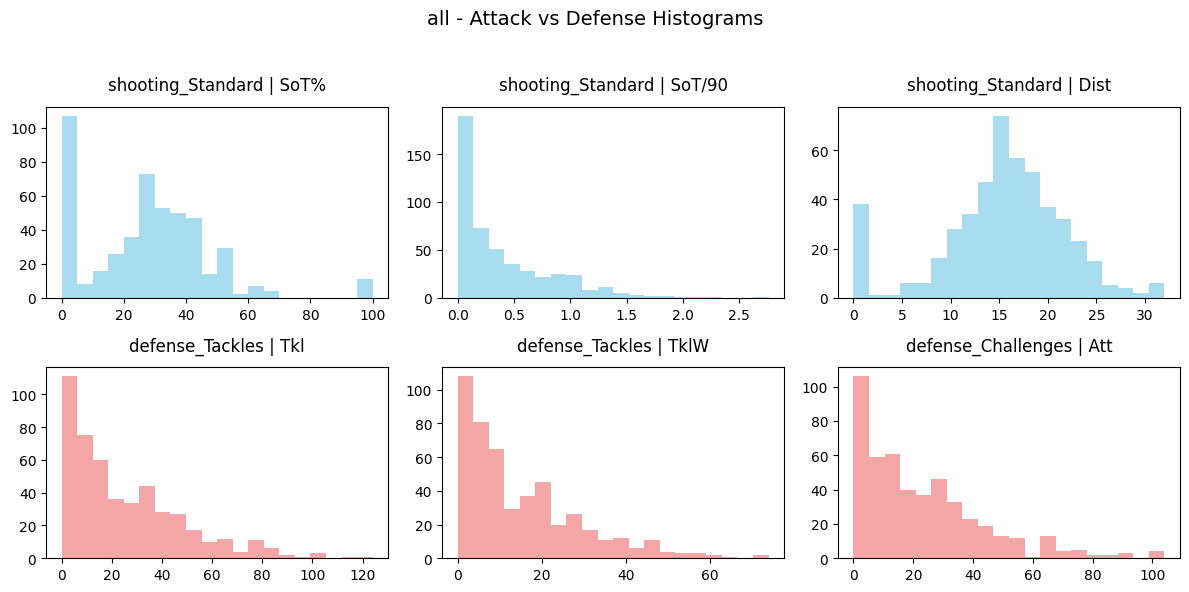

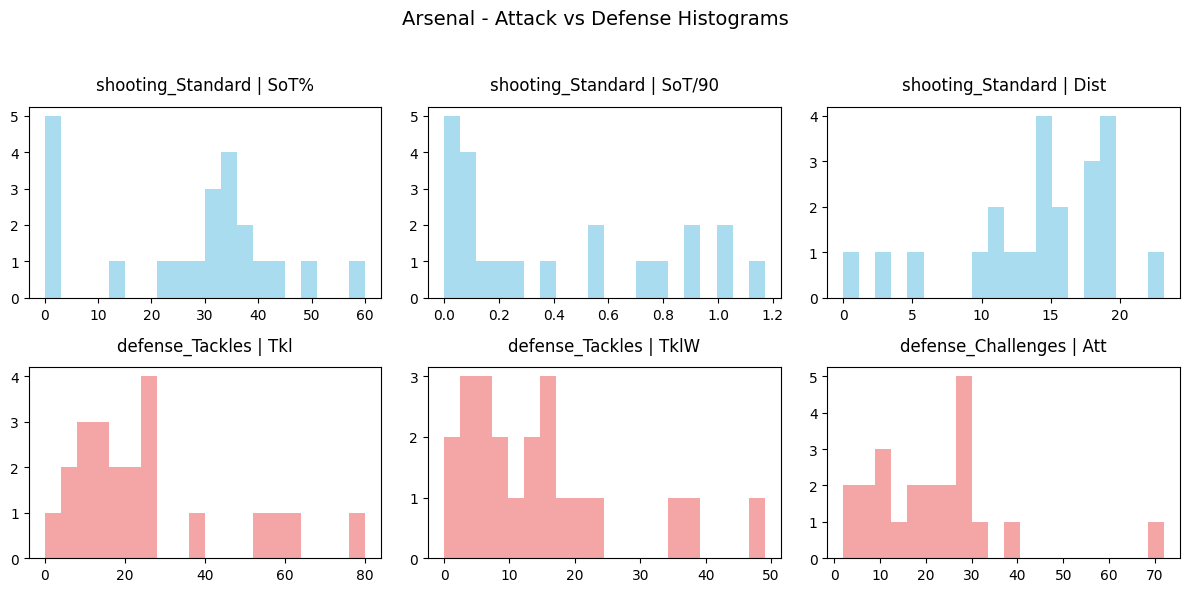

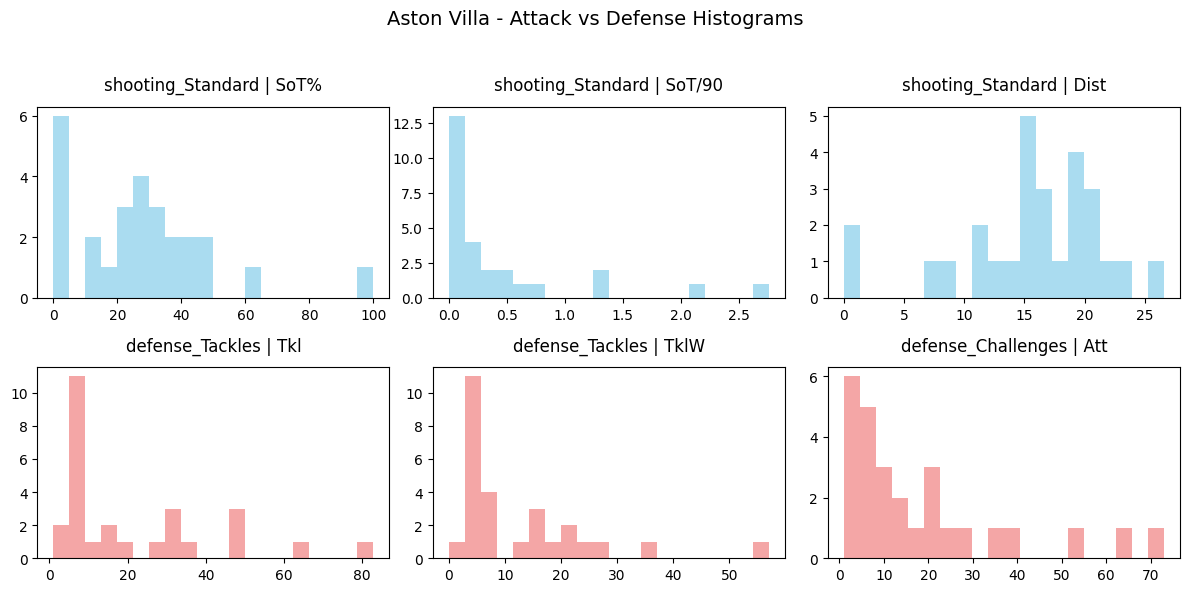

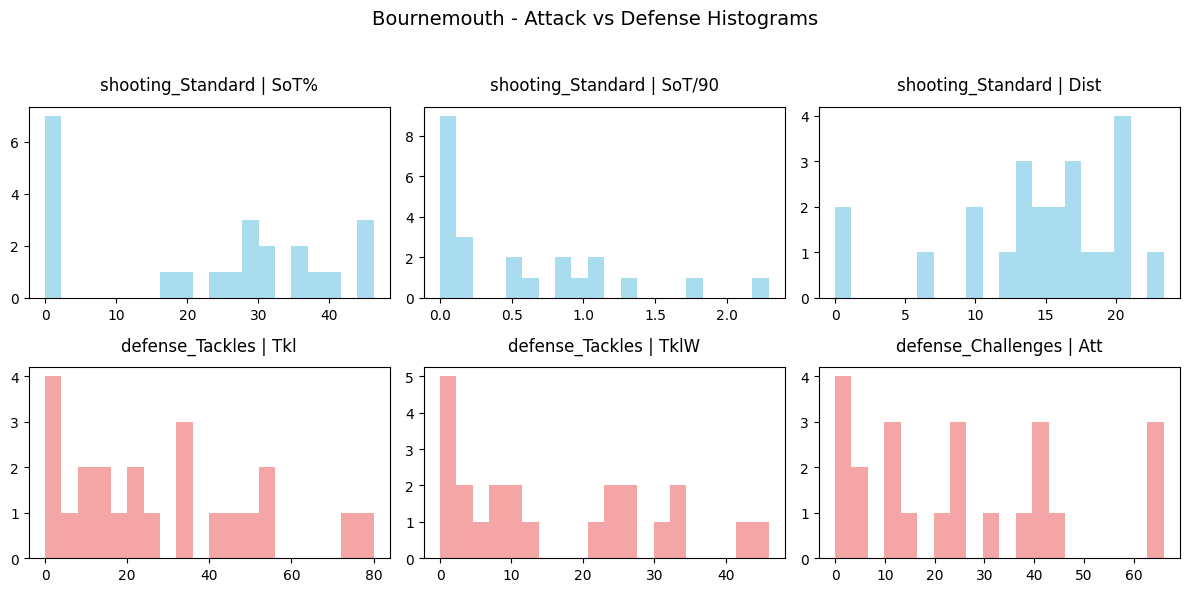

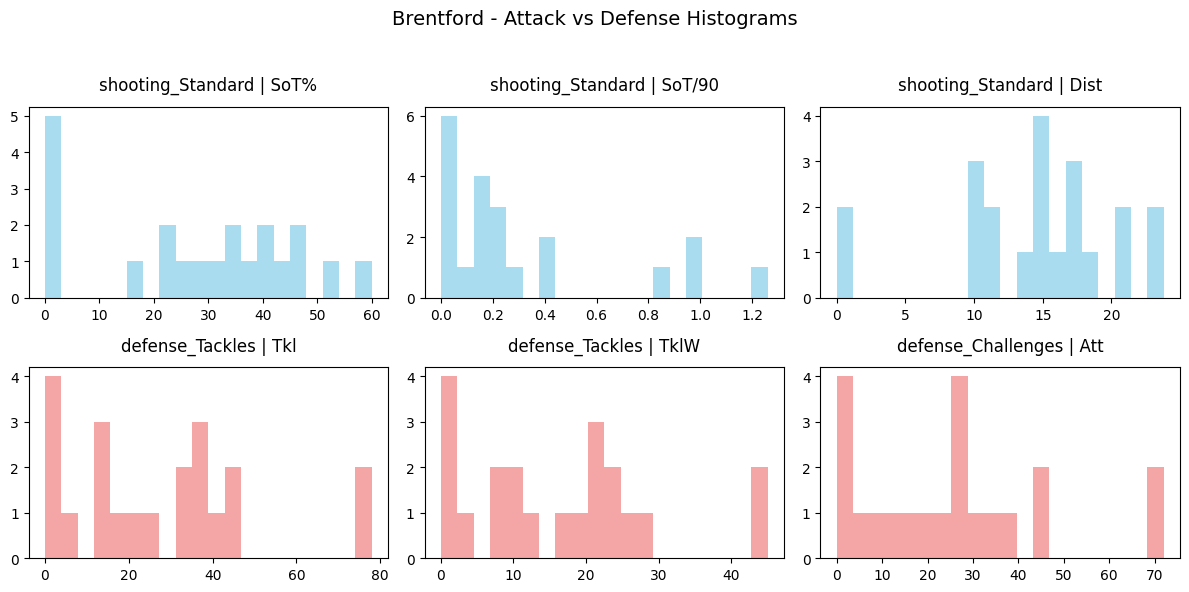

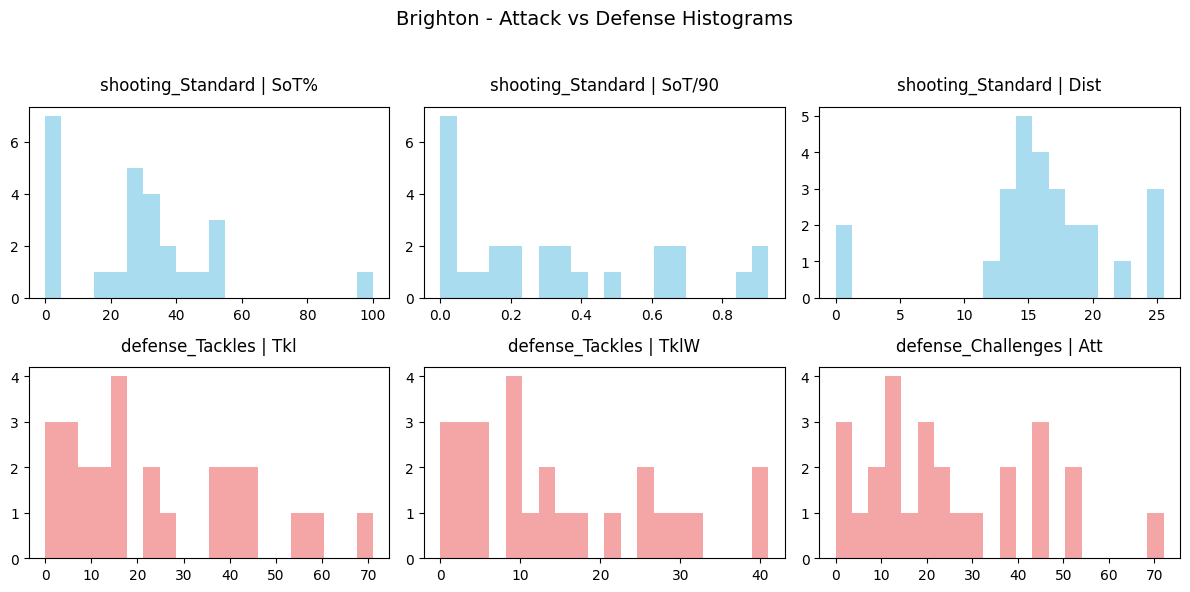

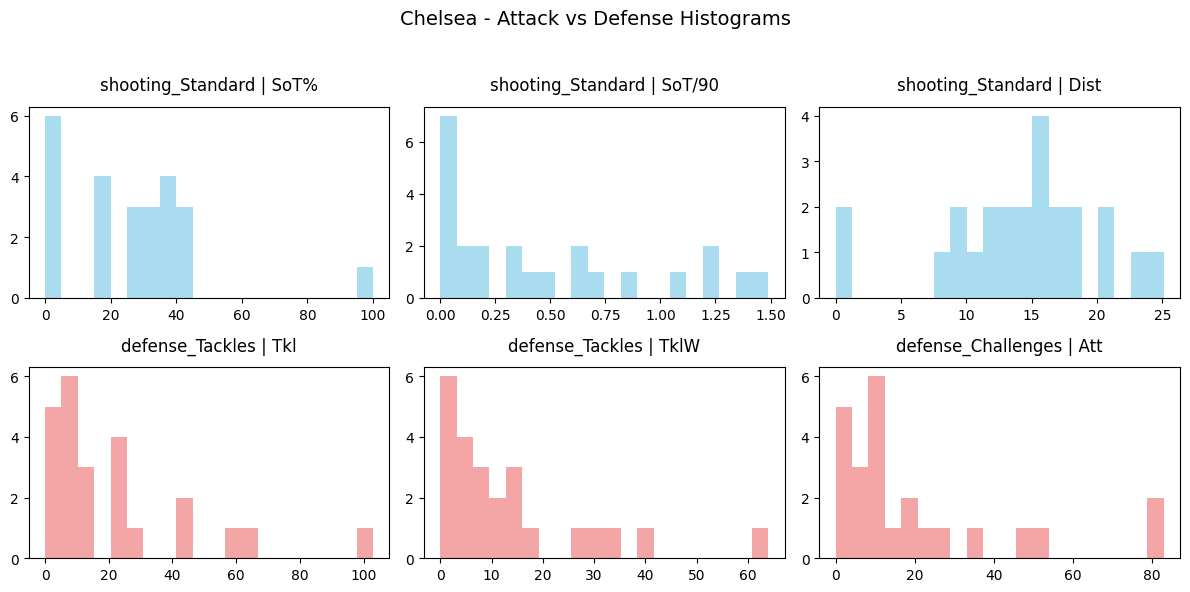

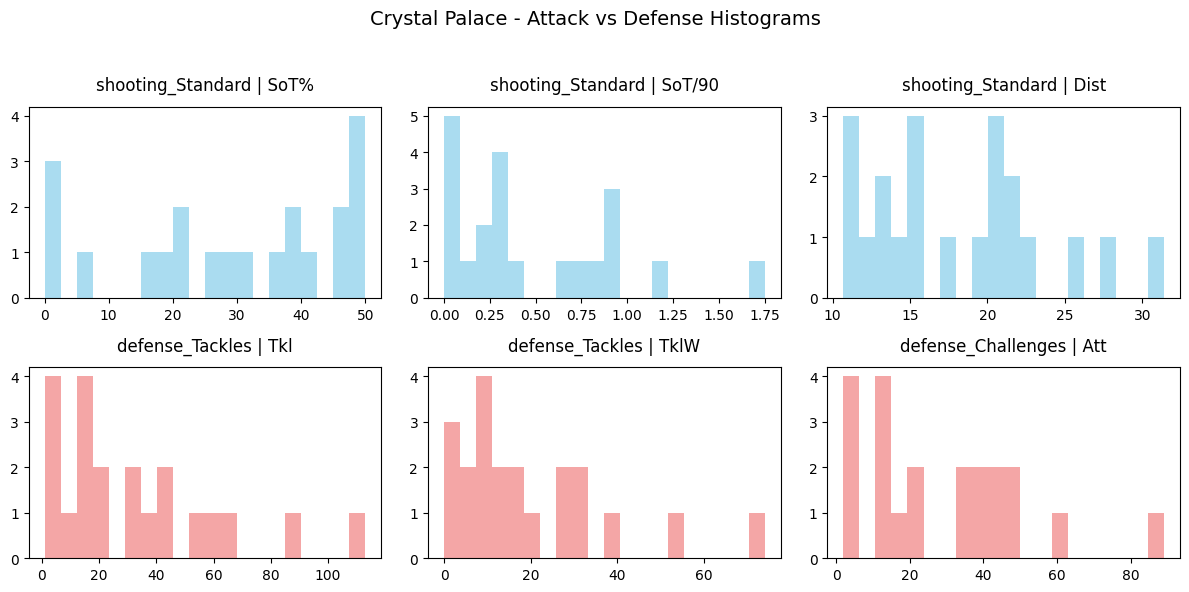

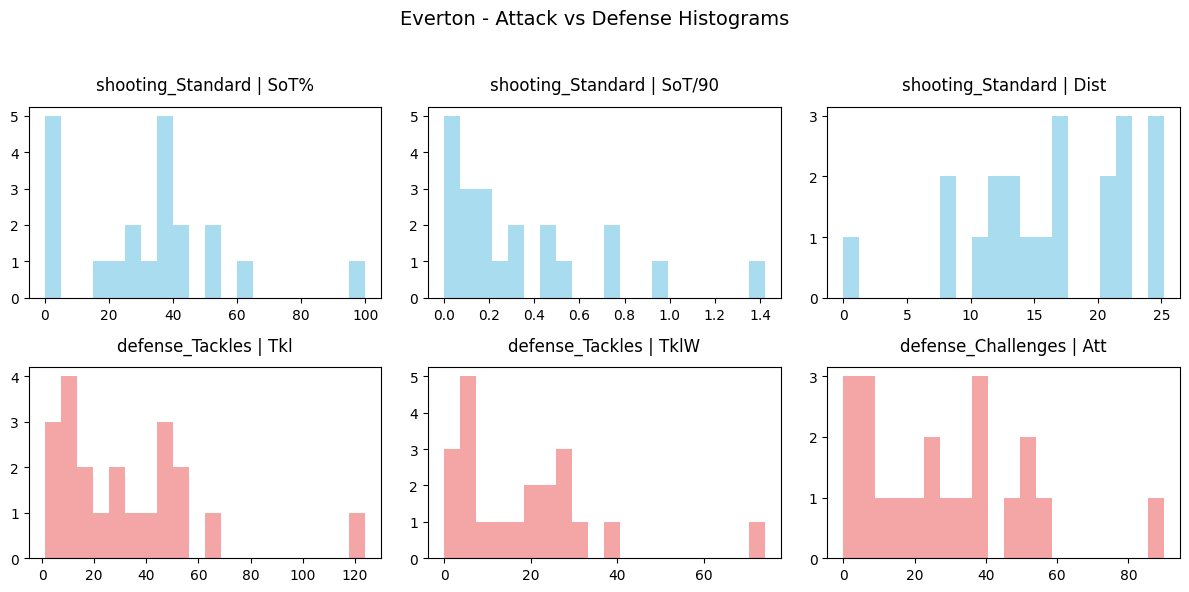

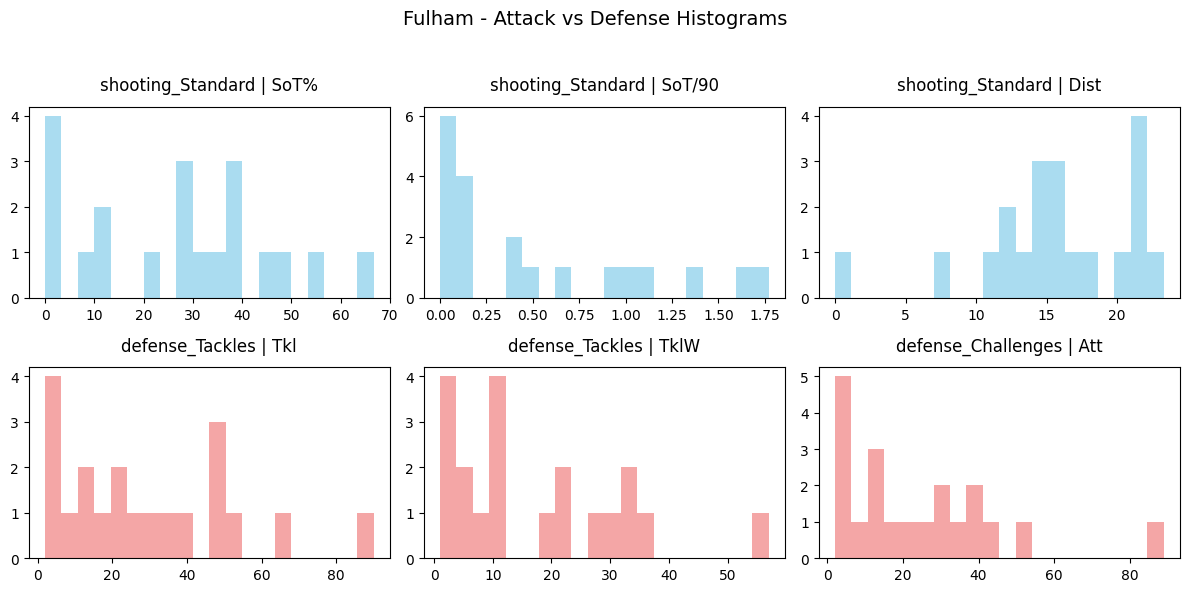

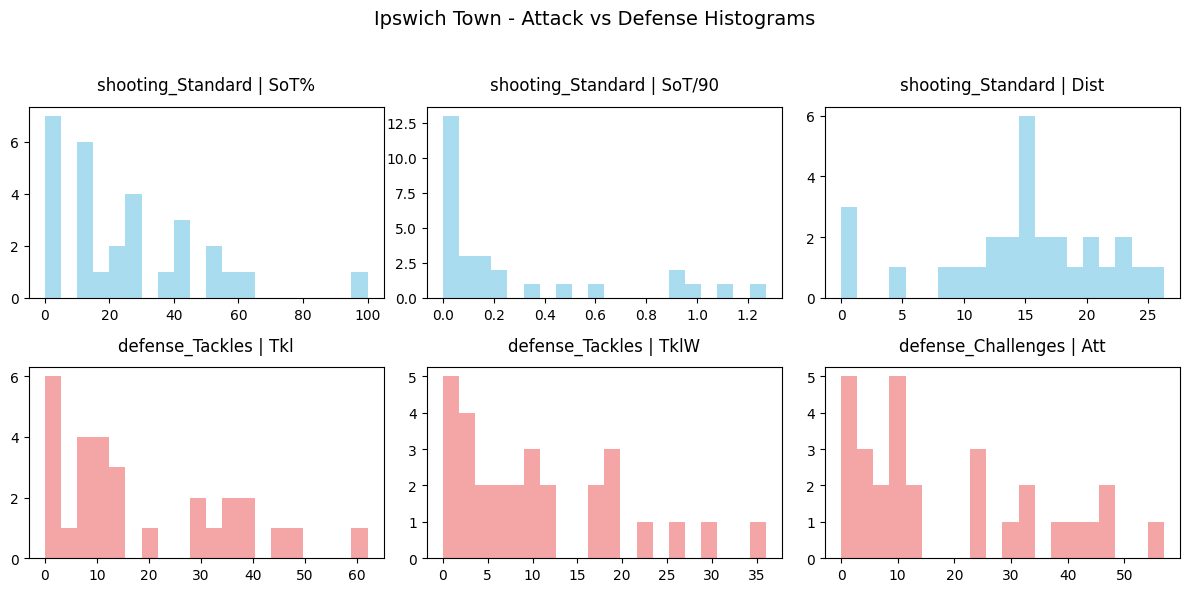

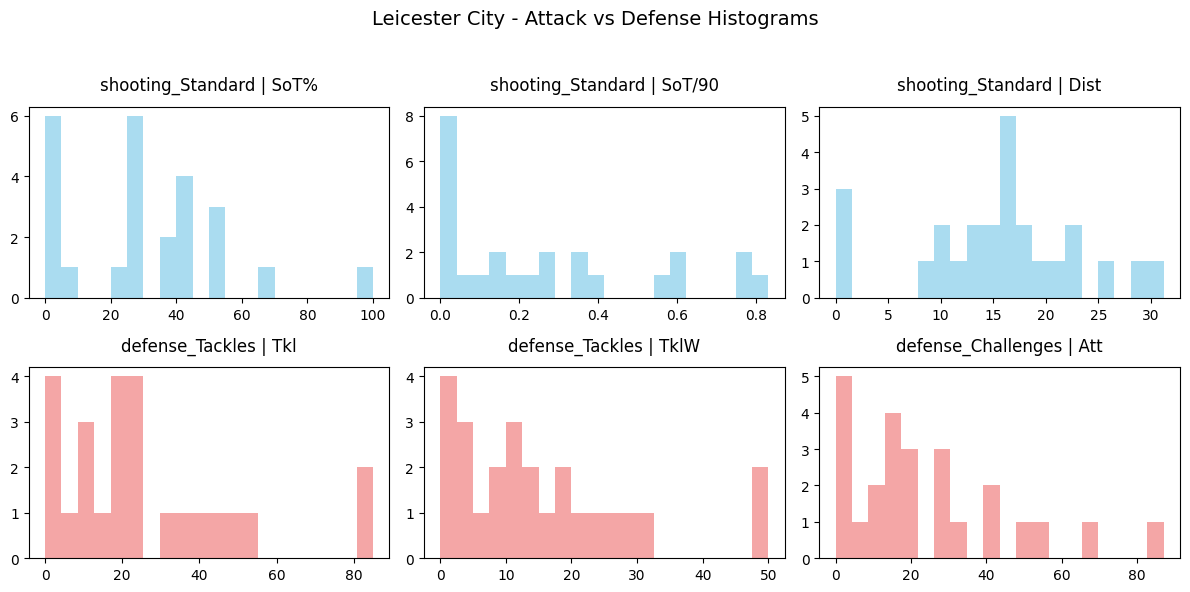

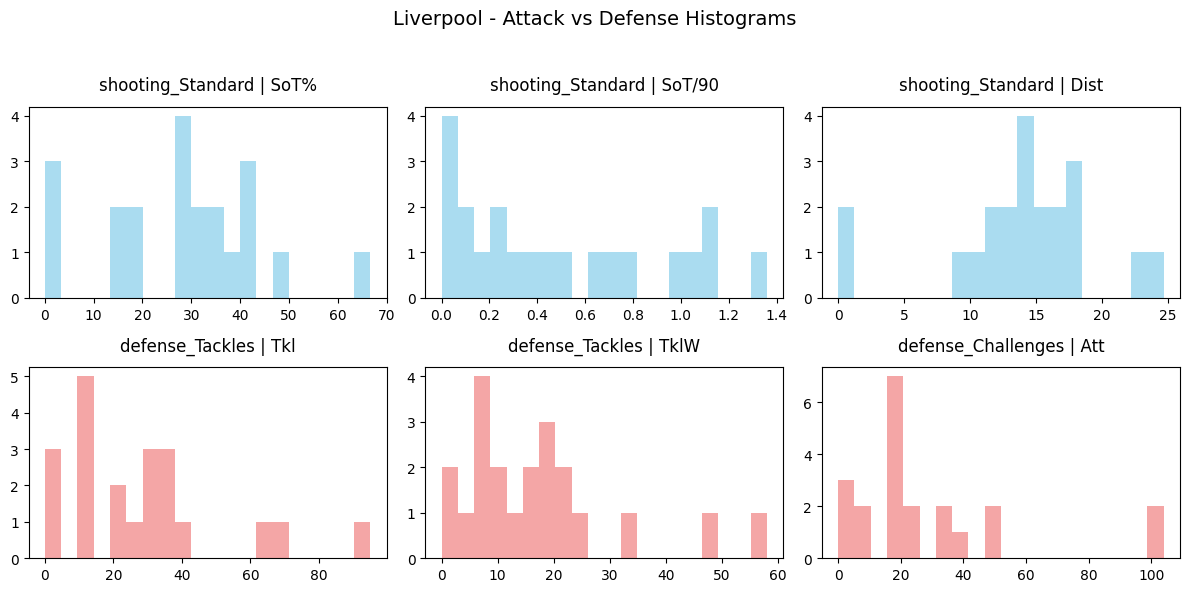

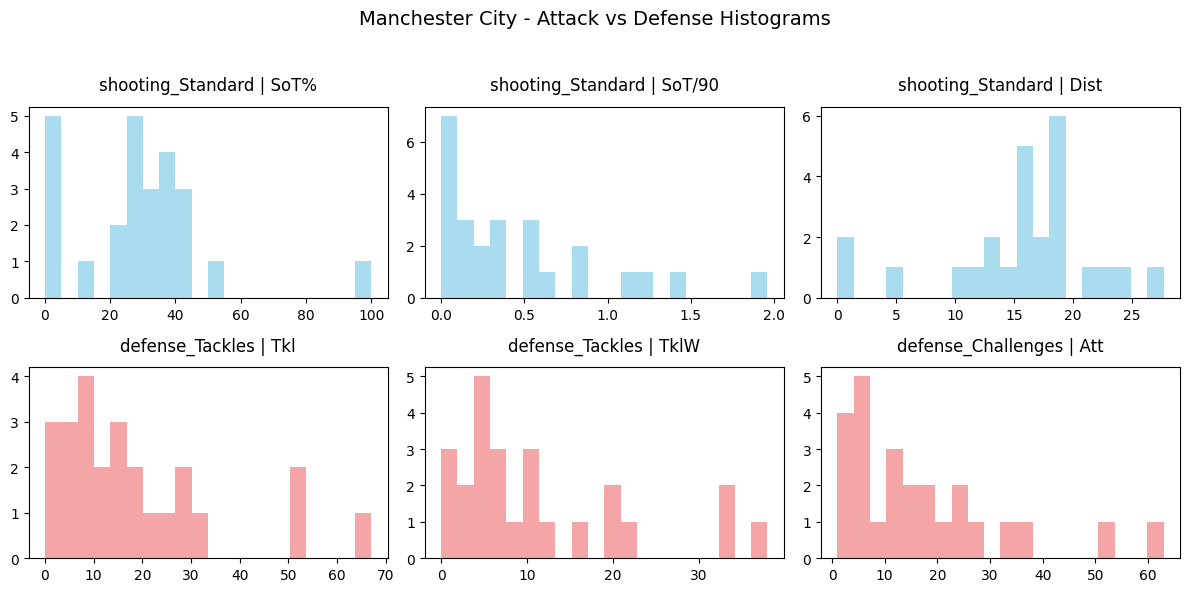

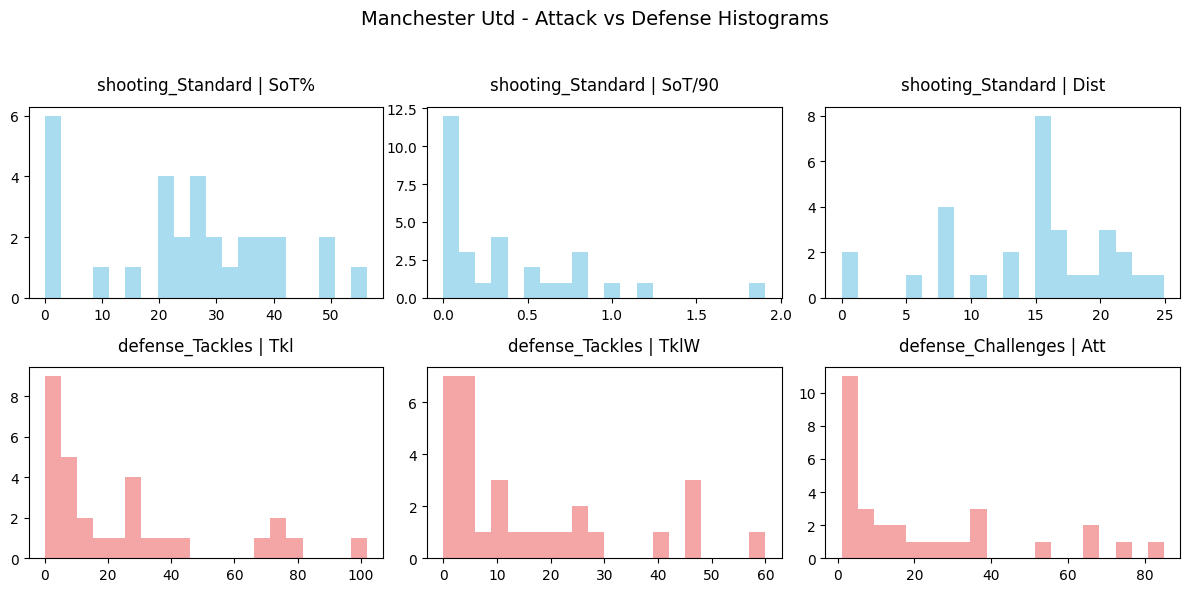

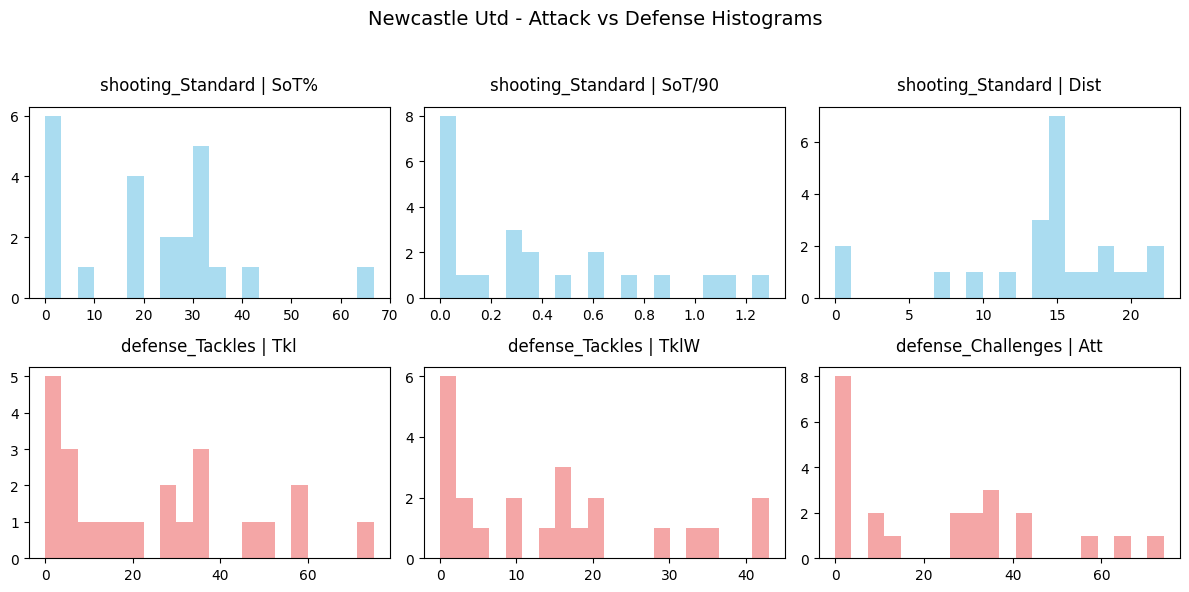

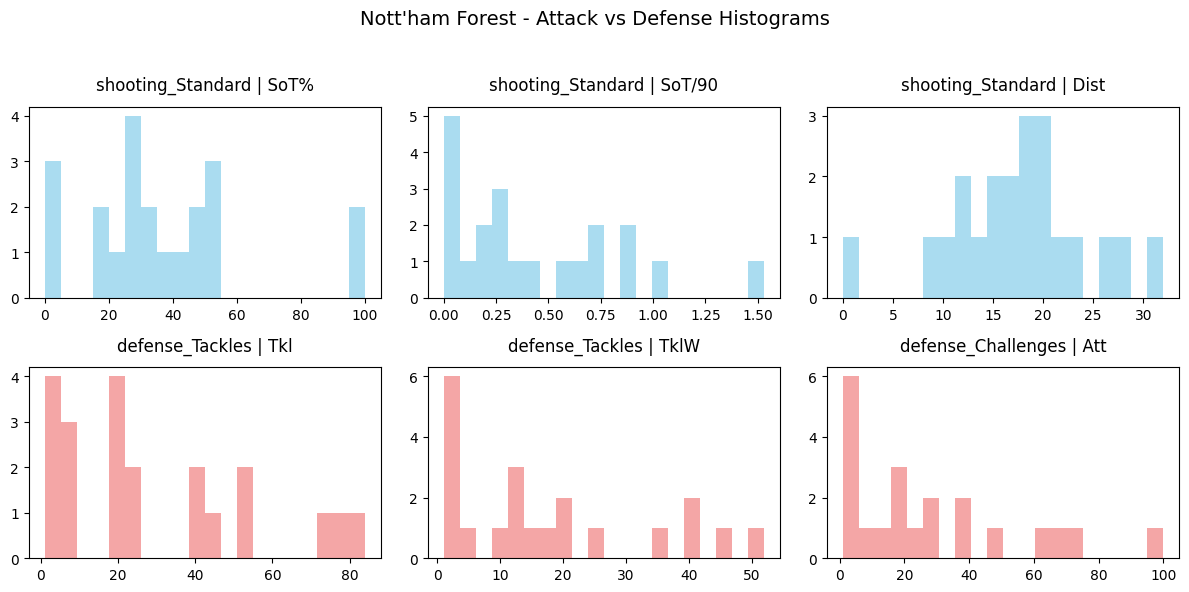

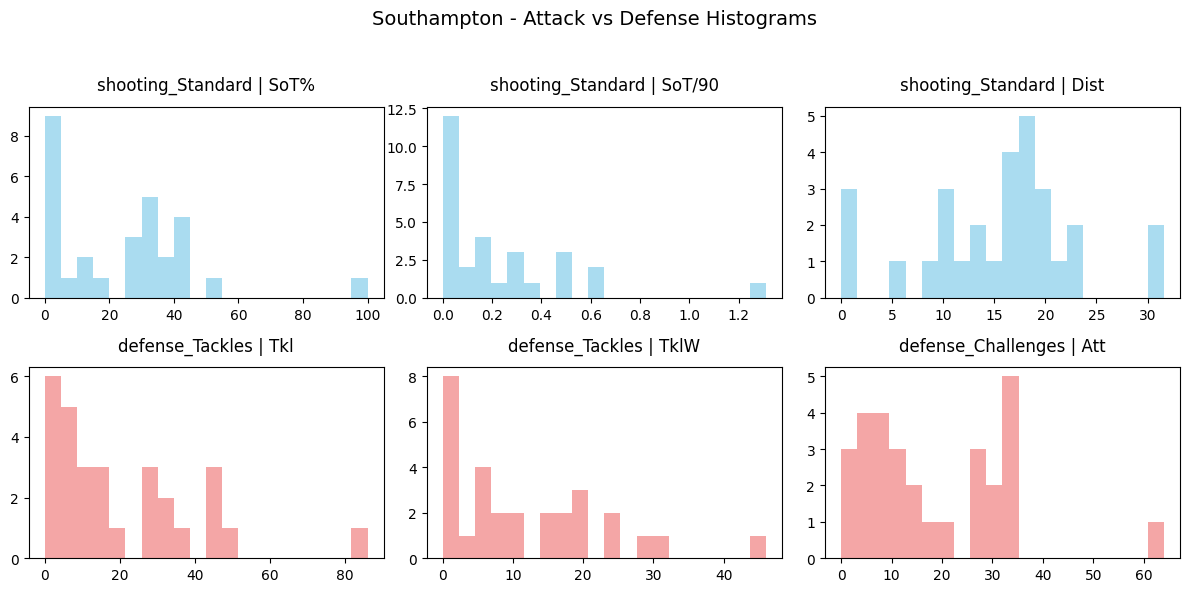

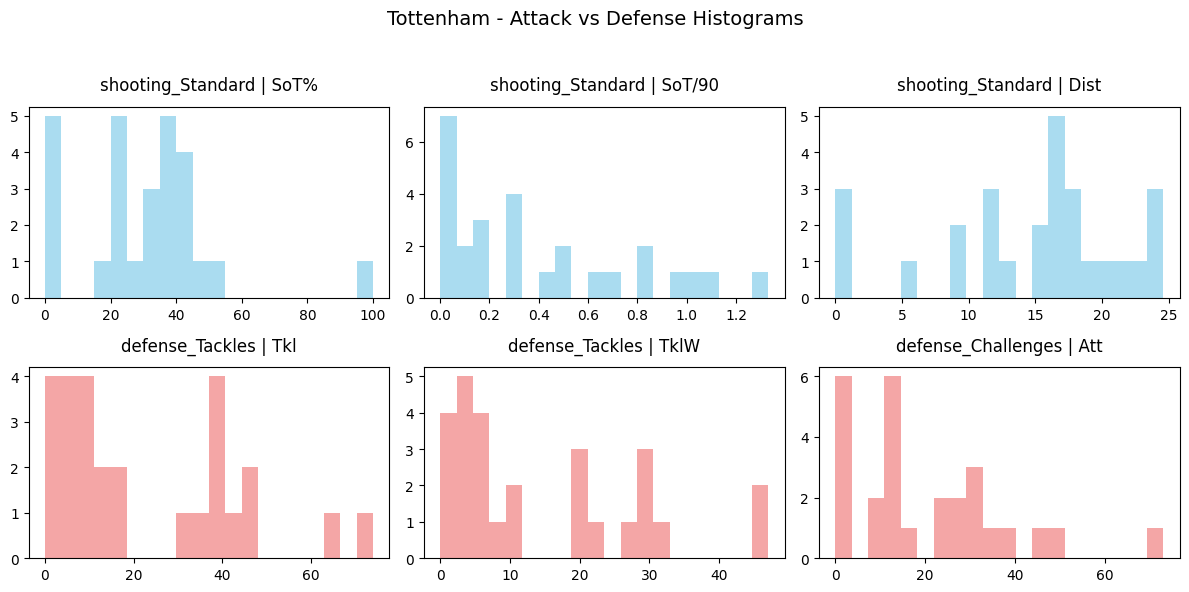

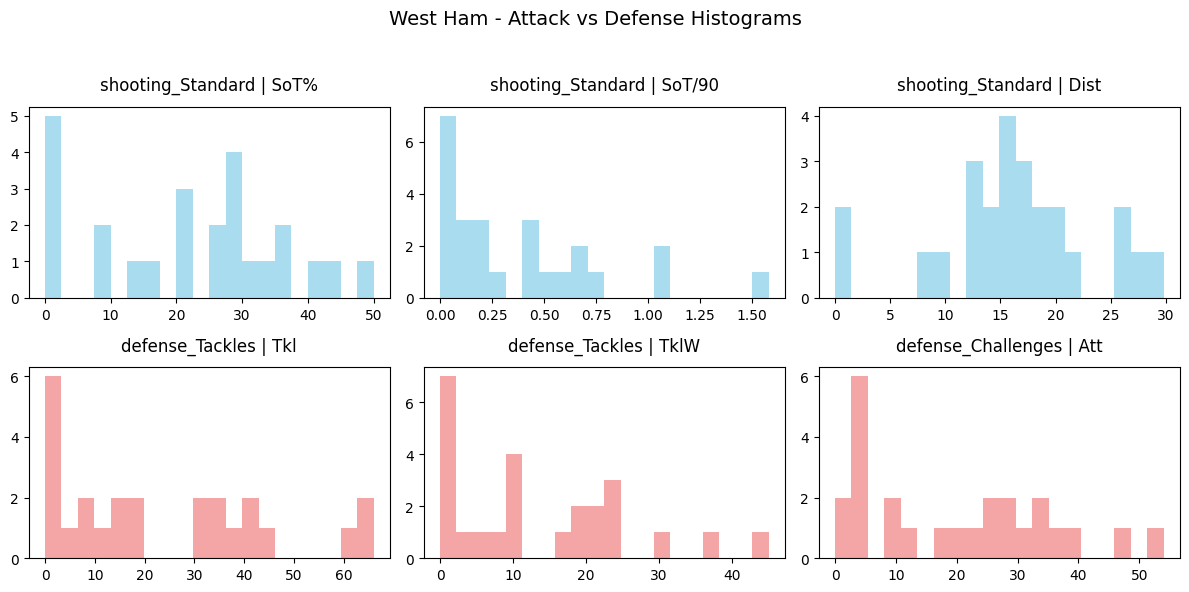

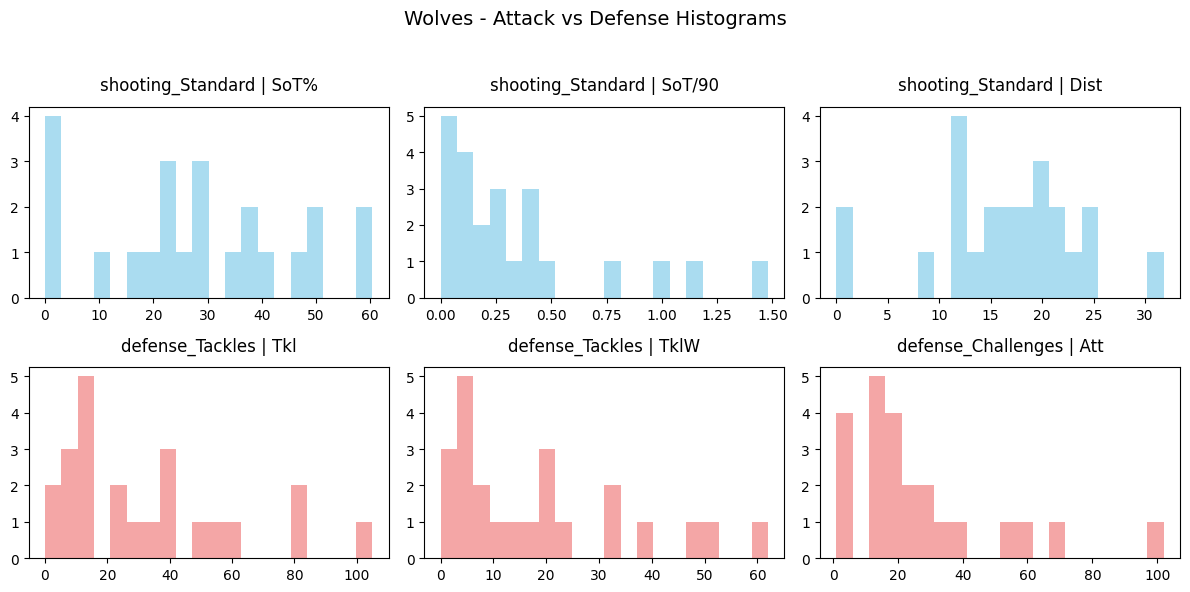

In [ ]:
import matplotlib.pyplot as plt

for team in teams:
    fig, (ax_row1, ax_row2) = plt.subplots(2, 3, figsize=(12, 6))
    fig.suptitle(f'{team} - Attack vs Defense Histograms', fontsize=14)

    for idx in range(3):
        if team == 'all':
            data_att = merged_df[att_feat[idx]]
            data_def = merged_df[def_feat[idx]]
        else:
            data_att = merged_df.loc[merged_df['standard | Squad'] == team, att_feat[idx]]
            data_def = merged_df.loc[merged_df['standard | Squad'] == team, def_feat[idx]]

        ax_row1[idx].hist(data_att, bins=20, color='skyblue', alpha=0.7)
        ax_row1[idx].set_title(f'{att_feat[idx]}', pad=12)

        ax_row2[idx].hist(data_def, bins=20, color='lightcoral', alpha=0.7)
        ax_row2[idx].set_title(f'{def_feat[idx]}', pad=12)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [31]:
team_only_df = metrics_df[metrics_df['Team'] != 'all']

stat_cols = [col for col in team_only_df.columns if col.startswith('Mean of')]

for col in stat_cols:
    max_row = team_only_df.loc[team_only_df[col].idxmax()]
    print(f"🔹 {col}: {max_row['Team']} với {max_row[col]}")


from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
team_scaled_df = team_only_df.copy()
team_scaled_df[stat_cols] = scaler.fit_transform(team_only_df[stat_cols])

team_scaled_df['Composite Score'] = team_scaled_df[stat_cols].mean(axis=1)

best_team_row = team_scaled_df.loc[team_scaled_df['Composite Score'].idxmax()]

print("\n🏆 Đội có performance tổng thể tốt nhất (dựa trên tất cả các chỉ số Mean):")
print(f"🔹 Team: {best_team_row['Team']}")
print(f"🔹 Composite Score: {best_team_row['Composite Score']:.3f}")


🔹 Mean of standard | Age: Fulham với 28.6
🔹 Mean of standard_Playing Time | MP: Nott'ham Forest với 25.24
🔹 Mean of standard_Playing Time | Starts: Brentford với 18.33
🔹 Mean of standard_Playing Time | Min: Liverpool với 1643.1
🔹 Mean of standard_Performance | Gls: Liverpool với 3.81
🔹 Mean of standard_Performance | Ast: Liverpool với 2.86
🔹 Mean of standard_Performance | CrdY: Chelsea với 3.88
🔹 Mean of standard_Performance | CrdR: Arsenal với 0.23
🔹 Mean of standard_Expected | xG: Liverpool với 3.68
🔹 Mean of standard_Expected | xAG: Liverpool với 2.68
🔹 Mean of standard_Progression | PrgC: Manchester City với 41.64
🔹 Mean of standard_Progression | PrgP: Liverpool với 83.95
🔹 Mean of standard_Progression | PrgR: Liverpool với 83.05
🔹 Mean of standard_Per 90 Minutes | Gls: Manchester City với 0.18
🔹 Mean of standard_Per 90 Minutes | Ast: Arsenal với 0.14
🔹 Mean of standard_Per 90 Minutes | xG: Aston Villa với 0.18
🔹 Mean of standard_Per 90 Minutes | xAG: Chelsea với 0.16
🔹 Mean of kee

<ipython-input-31-ea55b3b00195>:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  team_scaled_df['Composite Score'] = team_scaled_df[stat_cols].mean(axis=1)


Exercise 3

1. Use the K-means algorithm to classify players into groups based on their statistics.

2. How many groups should the players be classified into? Why? Provide your comments on the results.

3. Use PCA to reduce the data dimensions to 2, then plot a 2D cluster of the data points.

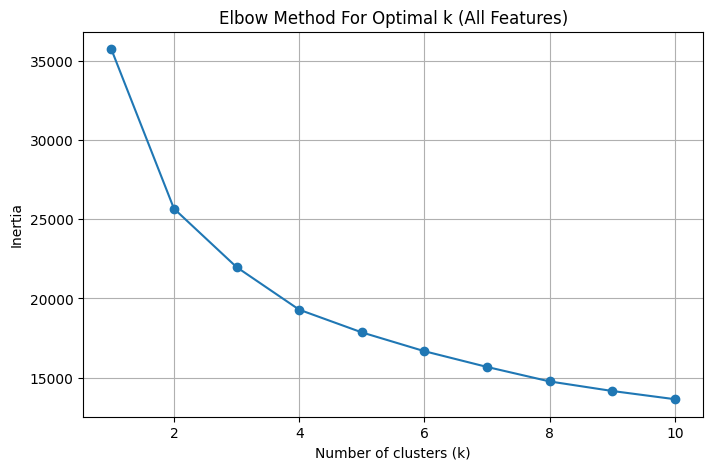

In [102]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

selected_columns = ['Player'] + clean_feat[4:]
df = merged_df.loc[:, selected_columns]

scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns=['Player']))


inertia_all = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia_all.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, inertia_all, marker='o')
plt.title('Elbow Method For Optimal k (All Features)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



In [103]:
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
kmeans_final.fit(scaled_df)

df['Cluster'] = kmeans_final.labels_

print(df[['Player', 'Cluster']].head(20))

                   Player  Cluster
0         Aaron Cresswell        2
1          Aaron Ramsdale        0
2       Aaron Wan-Bissaka        1
3      Abdoulaye Doucouré        1
4      Abdukodir Khusanov        2
5   Abdul Fatawu Issahaku        2
6          Adam Armstrong        2
7            Adam Lallana        2
8              Adam Smith        2
9            Adam Webster        2
10           Adam Wharton        2
11           Adama Traoré        3
12        Albert Grønbaek        2
13     Alejandro Garnacho        3
14             Alex Iwobi        3
15          Alex McCarthy        0
16            Alex Palmer        0
17             Alex Scott        2
18         Alexander Isak        3
19    Alexis Mac Allister        1


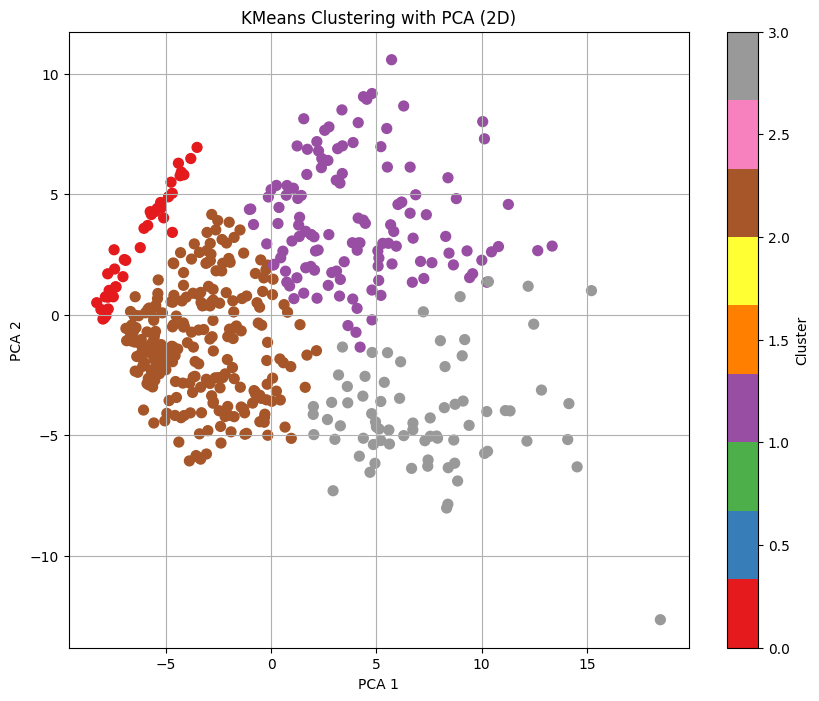

In [104]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_df)


plt.figure(figsize=(10,8))
scatter = plt.scatter(pca_df[:, 0], pca_df[:, 1], c=df['Cluster'], cmap='Set1', s=50)
plt.title('KMeans Clustering with PCA (2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [105]:
stats_cols = clean_feat[4:]

cluster_means = df.groupby('Cluster')[stats_cols].mean()


In [ ]:
cluster_means.to_excel('cluster_means.xlsx')


In [4]:
!pip install webdriver_manager

Exercise 4

1. Collect player transfer values for the 2024-2025 season from
https://www.footballtransfers.com. Note that only collect for the players whose playing time is greater than 900 minutes

2. Propose a method for estimating player values. How do you select feature and model?

In [5]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import pandas as pd
import time

def init_driver():
    chrome_options = Options()
    chrome_options.add_argument("--headless")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    return webdriver.Chrome(options=chrome_options)

def get_players_table_selenium(driver, url):
    driver.get(url)
    time.sleep(10)
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    table = soup.find("table")
    if table:
        df = pd.read_html(str(table))[0]
        return df
    else:
        print(f"❌ Không tìm thấy bảng tại {url}")
        return None

urls = [
    "https://www.footballtransfers.com/en/players/uk-premier-league",
    "https://www.footballtransfers.com/en/players/uk-premier-league/2",
    "https://www.footballtransfers.com/en/players/uk-premier-league/3",
    "https://www.footballtransfers.com/en/players/uk-premier-league/4",
    "https://www.footballtransfers.com/en/players/uk-premier-league/5",
    "https://www.footballtransfers.com/en/players/uk-premier-league/6",
    "https://www.footballtransfers.com/en/players/uk-premier-league/7",
    "https://www.footballtransfers.com/en/players/uk-premier-league/8",
    "https://www.footballtransfers.com/en/players/uk-premier-league/9",
    "https://www.footballtransfers.com/en/players/uk-premier-league/10",
    "https://www.footballtransfers.com/en/players/uk-premier-league/11",
    "https://www.footballtransfers.com/en/players/uk-premier-league/12",
    "https://www.footballtransfers.com/en/players/uk-premier-league/13",
    "https://www.footballtransfers.com/en/players/uk-premier-league/14",
    "https://www.footballtransfers.com/en/players/uk-premier-league/15",
    "https://www.footballtransfers.com/en/players/uk-premier-league/16",
    "https://www.footballtransfers.com/en/players/uk-premier-league/17",
    "https://www.footballtransfers.com/en/players/uk-premier-league/18",
    "https://www.footballtransfers.com/en/players/uk-premier-league/19",
    "https://www.footballtransfers.com/en/players/uk-premier-league/20",
    "https://www.footballtransfers.com/en/players/uk-premier-league/21",
    "https://www.footballtransfers.com/en/players/uk-premier-league/22"
]

driver = init_driver()
all_players_data = []

for idx, url in enumerate(urls, 1):
    print(f"🔍 Đang thu thập dữ liệu từ trang {idx}...")
    df = get_players_table_selenium(driver, url)
    if df is not None:
        all_players_data.append(df)
        print(f"✅ Đã thu thập {len(df)} dòng từ trang {idx}.")
    else:
        print(f"⚠️ Không thể thu thập dữ liệu từ trang {idx}.")

driver.quit()

if all_players_data:
    all_data = pd.concat(all_players_data, ignore_index=True)
    all_data.to_csv("football_transfers_players_all_pages.csv", index=False)
    print(f"📁 Đã lưu {len(all_data)} dòng dữ liệu vào 'football_transfers_players_all_pages.csv'")
else:
    print("❌ Không có dữ liệu để lưu.")


🔍 Đang thu thập dữ liệu từ trang 1...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 1.
🔍 Đang thu thập dữ liệu từ trang 2...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 2.
🔍 Đang thu thập dữ liệu từ trang 3...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 3.
🔍 Đang thu thập dữ liệu từ trang 4...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 4.
🔍 Đang thu thập dữ liệu từ trang 5...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 5.
🔍 Đang thu thập dữ liệu từ trang 6...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 6.
🔍 Đang thu thập dữ liệu từ trang 7...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 7.
🔍 Đang thu thập dữ liệu từ trang 8...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 8.
🔍 Đang thu thập dữ liệu từ trang 9...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 9.
🔍 Đang thu thập dữ liệu từ trang 10...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 10.
🔍 Đang thu thập dữ liệu từ trang 11...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 11.
🔍 Đang thu thập dữ liệu từ trang 12...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 12.
🔍 Đang thu thập dữ liệu từ trang 13...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 13.
🔍 Đang thu thập dữ liệu từ trang 14...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 14.
🔍 Đang thu thập dữ liệu từ trang 15...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 15.
🔍 Đang thu thập dữ liệu từ trang 16...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 16.
🔍 Đang thu thập dữ liệu từ trang 17...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 17.
🔍 Đang thu thập dữ liệu từ trang 18...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 18.
🔍 Đang thu thập dữ liệu từ trang 19...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 19.
🔍 Đang thu thập dữ liệu từ trang 20...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 20.
🔍 Đang thu thập dữ liệu từ trang 21...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 25 dòng từ trang 21.
🔍 Đang thu thập dữ liệu từ trang 22...


<ipython-input-5-9f0df13b62ef>:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


✅ Đã thu thập 6 dòng từ trang 22.
📁 Đã lưu 531 dòng dữ liệu vào 'football_transfers_players_all_pages.csv'


In [69]:
value_df = all_data.copy()

In [70]:
value_df.columns = value_df.columns.get_level_values(0)

In [71]:
value_df['Player'].value_counts()

,count
Player,
Richard Olise Richard Olise Chelsea • D (R) D (R),1
Erling Haaland Erling Haaland Man City • F (C) F (C),1
"Martin Ødegaard Martin Ødegaard Arsenal • M, AM (C) M, AM (C)",1
Joel Ward Joel Ward C. Palace • D (R) D (R),1
Fraser Forster Fraser Forster Tottenham • GK GK,1
...,...
"Bukayo Saka Bukayo Saka Arsenal • F, M (R) F, M (R)",1
Phil Foden Phil Foden Man City • M (CR) M (CR),1
"Alexis Mac Allister Alexis Mac Allister Liverpool • M, DM, AM (C) M, DM, AM (C)",1


In [72]:
def remove_duplicate_prefix(text):
    words = text.split()
    for i in range(1, len(words)//2 + 1):
        if words[:i] == words[i:2*i]:
            return ' '.join(words[:i])
    return text

value_df['Player'] = value_df['Player'].apply(remove_duplicate_prefix)


In [73]:
value_df.columns

Index(['Skill / pot', 'Player', 'Age', 'Team', 'ETV'], dtype='object')

In [74]:
player_df = merged_df[clean_feat].copy()

In [75]:
value_df.drop(columns=['Skill / pot', 'Age', 'Team'], inplace=True)
value_df.head()

,Player,ETV
0,Erling Haaland,€198.8M
1,Martin Ødegaard,€126.5M
2,Alexander Isak,€120.3M
3,Cole Palmer,€115.4M
4,Declan Rice,€107.8M


In [76]:
def normalize_name(name):
    return ' '.join(sorted(name.lower().split()))

player_df["Normalized_Name"] = player_df["Player"].apply(normalize_name)
value_df["Normalized_Name"] = value_df["Player"].apply(normalize_name)



In [77]:
final_df = pd.merge(player_df, value_df, on="Normalized_Name", how="inner", suffixes=('_df1', '_df2'))
final_df.head()

,Player_df1,standard | Nation,standard | Pos,standard | Squad,standard | Age,standard_Playing Time | MP,standard_Playing Time | Starts,standard_Playing Time | Min,standard_Performance | Gls,standard_Performance | Ast,...,misc_Performance | Fld,misc_Performance | Off,misc_Performance | Crs,misc_Performance | Recov,misc_Aerial Duels | Won,misc_Aerial Duels | Lost,misc_Aerial Duels | Won%,Normalized_Name,Player_df2,ETV
0,Aaron Cresswell,eng ENG,DF,West Ham,35.0,15.0,8.0,676.0,0.0,0.0,...,2.0,0.0,28.0,29.0,7.0,6.0,53.8,aaron cresswell,Aaron Cresswell,€0.8M
1,Aaron Ramsdale,eng ENG,GK,Southampton,26.0,27.0,27.0,2430.0,0.0,0.0,...,4.0,0.0,0.0,20.0,5.0,0.0,100.0,aaron ramsdale,Aaron Ramsdale,€18.7M
2,Aaron Wan-Bissaka,eng ENG,DF,West Ham,27.0,33.0,32.0,2884.0,2.0,3.0,...,25.0,4.0,70.0,163.0,22.0,30.0,42.3,aaron wan-bissaka,Aaron Wan-Bissaka,€26.9M
3,Abdoulaye Doucouré,ml MLI,MF,Everton,32.0,30.0,29.0,2425.0,3.0,1.0,...,5.0,10.0,23.0,139.0,29.0,43.0,40.3,abdoulaye doucouré,Abdoulaye Doucouré,€5.8M
4,Abdukodir Khusanov,uz UZB,DF,Manchester City,21.0,6.0,6.0,503.0,0.0,0.0,...,3.0,0.0,1.0,27.0,6.0,4.0,60.0,abdukodir khusanov,Abdukodir Khusanov,€48.4M


In [78]:
final_df.rename(columns={"Player_df1": "Player"}, inplace=True)


In [79]:
final_df.columns

Index(['Player', 'standard | Nation', 'standard | Pos', 'standard | Squad',
       'standard | Age', 'standard_Playing Time | MP',
       'standard_Playing Time | Starts', 'standard_Playing Time | Min',
       'standard_Performance | Gls', 'standard_Performance | Ast',
       'standard_Performance | CrdY', 'standard_Performance | CrdR',
       'standard_Expected | xG', 'standard_Expected | xAG',
       'standard_Progression | PrgC', 'standard_Progression | PrgP',
       'standard_Progression | PrgR', 'standard_Per 90 Minutes | Gls',
       'standard_Per 90 Minutes | Ast', 'standard_Per 90 Minutes | xG',
       'standard_Per 90 Minutes | xAG', 'keepers_Performance | GA90',
       'keepers_Performance | Save%', 'keepers_Performance | CS%',
       'keepers_Penalty Kicks | Save%', 'shooting_Standard | SoT%',
       'shooting_Standard | SoT/90', 'shooting_Standard | G/Sh',
       'shooting_Standard | Dist', 'passing_Total | Cmp',
       'passing_Total | Cmp%', 'passing_Total | TotDist',
   

In [80]:
final_df.drop(columns=['Normalized_Name', 'Player_df2'], inplace=True)
final_df.head()

,Player,standard | Nation,standard | Pos,standard | Squad,standard | Age,standard_Playing Time | MP,standard_Playing Time | Starts,standard_Playing Time | Min,standard_Performance | Gls,standard_Performance | Ast,...,possession_Receiving | PrgR,misc_Performance | Fls,misc_Performance | Fld,misc_Performance | Off,misc_Performance | Crs,misc_Performance | Recov,misc_Aerial Duels | Won,misc_Aerial Duels | Lost,misc_Aerial Duels | Won%,ETV
0,Aaron Cresswell,eng ENG,DF,West Ham,35.0,15.0,8.0,676.0,0.0,0.0,...,2.0,3.0,2.0,0.0,28.0,29.0,7.0,6.0,53.8,€0.8M
1,Aaron Ramsdale,eng ENG,GK,Southampton,26.0,27.0,27.0,2430.0,0.0,0.0,...,0.0,1.0,4.0,0.0,0.0,20.0,5.0,0.0,100.0,€18.7M
2,Aaron Wan-Bissaka,eng ENG,DF,West Ham,27.0,33.0,32.0,2884.0,2.0,3.0,...,150.0,22.0,25.0,4.0,70.0,163.0,22.0,30.0,42.3,€26.9M
3,Abdoulaye Doucouré,ml MLI,MF,Everton,32.0,30.0,29.0,2425.0,3.0,1.0,...,91.0,46.0,5.0,10.0,23.0,139.0,29.0,43.0,40.3,€5.8M
4,Abdukodir Khusanov,uz UZB,DF,Manchester City,21.0,6.0,6.0,503.0,0.0,0.0,...,2.0,3.0,3.0,0.0,1.0,27.0,6.0,4.0,60.0,€48.4M


In [81]:
for index, row in final_df.iterrows():
    for col in final_df.columns:
        if pd.isnull(row[col]):
            print(f"❌ Missing '{col}' for player: {row['Player']}")


In [82]:
final_df = final_df[final_df['standard_Playing Time | Min'] > 900]
final_df['standard_Playing Time | Min'].sort_values(ascending=False)

,standard_Playing Time | Min
48,3150.0
100,3150.0
99,3150.0
205,3150.0
399,3150.0
...,...
292,950.0
45,941.0
405,926.0
342,925.0


In [83]:
def map_position_type(pos_str):
    if 'GK' in pos_str:
        return 'Goalkeeper'
    elif 'FW' in pos_str and 'MF' not in pos_str and 'DF' not in pos_str:
        return 'Attacker'
    elif 'FW' in pos_str and 'MF' in pos_str:
        return 'Attacking Midfielder'
    elif 'FW' in pos_str and 'DF' in pos_str:
        return 'Attacking Defender'
    elif 'MF' in pos_str and 'DF' in pos_str:
        return 'Defensive Midfielder'
    elif 'MF' in pos_str:
        return 'Midfielder'
    elif 'DF' in pos_str:
        return 'Defender'
    else:
        return 'Unknown'

final_df['PositionType'] = final_df['standard | Pos'].apply(map_position_type)
final_df['PositionType'].value_counts()

,count
PositionType,
Defender,98
Midfielder,58
Attacking Midfielder,47
Attacker,42
Goalkeeper,21
Defensive Midfielder,14
Attacking Defender,4


In [84]:
final_df['standard | Nation'] = final_df['standard | Nation'].apply(lambda x: x.split()[1])
final_df.head()

,Player,standard | Nation,standard | Pos,standard | Squad,standard | Age,standard_Playing Time | MP,standard_Playing Time | Starts,standard_Playing Time | Min,standard_Performance | Gls,standard_Performance | Ast,...,misc_Performance | Fls,misc_Performance | Fld,misc_Performance | Off,misc_Performance | Crs,misc_Performance | Recov,misc_Aerial Duels | Won,misc_Aerial Duels | Lost,misc_Aerial Duels | Won%,ETV,PositionType
1,Aaron Ramsdale,ENG,GK,Southampton,26.0,27.0,27.0,2430.0,0.0,0.0,...,1.0,4.0,0.0,0.0,20.0,5.0,0.0,100.0,€18.7M,Goalkeeper
2,Aaron Wan-Bissaka,ENG,DF,West Ham,27.0,33.0,32.0,2884.0,2.0,3.0,...,22.0,25.0,4.0,70.0,163.0,22.0,30.0,42.3,€26.9M,Defender
3,Abdoulaye Doucouré,MLI,MF,Everton,32.0,30.0,29.0,2425.0,3.0,1.0,...,46.0,5.0,10.0,23.0,139.0,29.0,43.0,40.3,€5.8M,Midfielder
7,Adam Smith,ENG,DF,Bournemouth,34.0,22.0,17.0,1409.0,0.0,0.0,...,15.0,11.0,0.0,30.0,43.0,12.0,13.0,48.0,€1.5M,Defender
9,Adam Wharton,ENG,MF,Crystal Palace,20.0,20.0,16.0,1318.0,0.0,2.0,...,12.0,21.0,0.0,39.0,102.0,7.0,16.0,30.4,€48.9M,Midfielder


In [85]:
def convert_market_value(value_str):
    value_str = value_str.lower().replace('€', '').strip()
    if value_str.endswith('k'):
        return int(float(value_str[:-1]) * 1_000)
    elif value_str.endswith('m'):
        return int(float(value_str[:-1]) * 1_000_000)
    else:
        return int(float(value_str))

final_df['ETV'] = final_df['ETV'].apply(convert_market_value)


In [86]:
final_df.rename(columns={'ETV' : 'Market Value(EUR)'}, inplace=True)

In [87]:
final_df['Market Value(EUR)'].value_counts()

,count
Market Value(EUR),
24400000,5
13600000,4
4200000,3
5800000,3
61700000,3
...,...
25000000,1
42600000,1
21400000,1


In [88]:
feature_cols = [

    # Thông tin nền tảng
    'standard | Age',
    'standard | Nation',
    'standard | Squad',
    'PositionType',

    # Thời gian thi đấu
    'standard_Playing Time | MP',
    'standard_Playing Time | Starts',
    'standard_Playing Time | Min',

    # Hiệu suất tổng quát
    'standard_Performance | Gls',
    'standard_Performance | Ast',
    'standard_Expected | xG',
    'standard_Expected | xAG',
    'standard_Per 90 Minutes | Gls',
    'standard_Per 90 Minutes | Ast',
    'standard_Per 90 Minutes | xG',
    'standard_Per 90 Minutes | xAG',

    # Dứt điểm
    'shooting_Standard | SoT%',
    'shooting_Standard | G/Sh',
    'shooting_Standard | Dist',

    # Tạo cơ hội
    'passing | KP',
    'passing | 1/3',
    'passing | PPA',
    'passing | CrsPA',
    'gca_SCA | SCA',
    'gca_SCA | SCA90',
    'gca_GCA | GCA',
    'gca_GCA | GCA90',

    # Tiến triển bóng
    'standard_Progression | PrgC',
    'standard_Progression | PrgP',
    'standard_Progression | PrgR',

    # Phòng ngự
    'defense_Tackles | Tkl',
    'defense_Tackles | TklW',
    'defense_Blocks | Blocks',
    'defense | Int',
    'misc_Performance | Recov',
    'misc_Aerial Duels | Won%',

    # Thủ môn (sử dụng được nếu dùng chung mô hình)
    'keepers_Performance | GA90',
    'keepers_Performance | Save%',
    'keepers_Performance | CS%',
    'keepers_Penalty Kicks | Save%',

    # Phân phối và kiểm soát bóng
    'passing_Total | Cmp%',
    'passing_Total | TotDist',
    'passing_Short | Cmp%',
    'passing_Medium | Cmp%',
    'passing_Long | Cmp%',
    'possession_Carries | Carries',
    'possession_Carries | PrgDist',
    'possession_Receiving | PrgR',
]


In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [90]:
X = final_df[feature_cols]
y = final_df['Market Value(EUR)']

In [91]:
from sklearn.preprocessing import LabelEncoder


categorical_cols = [
    'standard | Nation',
    'standard | Squad',
    'PositionType'
]

for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])


<ipython-input-91-5aacf2be86b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-91-5aacf2be86b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
<ipython-input-91-5aacf2be86b8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [93]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()
X_train = scl.fit_transform(X_train)
X_test = scl.transform(X_test)

In [94]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [99]:
y_pred = rf_model.predict(X_test)
pred_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_df['Predicted'] = pred_df['Predicted'].astype(int)
pred_df['Player'] = final_df.loc[y_test.index, 'Player']
pred_df = pred_df[['Player', 'Actual', 'Predicted']]
pred_df.index = range(1, len(pred_df) + 1)
pred_df

,Player,Actual,Predicted
1,Alexander Isak,120300000,105612000
2,Thomas Partey,15200000,33897999
3,Kobbie Mainoo,66000000,28689999
4,Neco Williams,23400000,31491999
5,Dominic Calvert-Lewin,17800000,23348999
6,Robert Sánchez,24900000,26412000
7,Tyrone Mings,5800000,6627000
8,Liam Delap,37000000,35981999
9,Calvin Bassey,29900000,48151000
10,Pedro Neto,60600000,56915000


In [101]:
pred_df.to_csv('prediction.csv')

In [100]:
import numpy as np
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2 Score: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

R2 Score: 0.6986014432124508
MAE: 11479964.928421052
MSE: 219758289086614.06
RMSE: 14824246.66168956


<Axes: xlabel='Feature'>

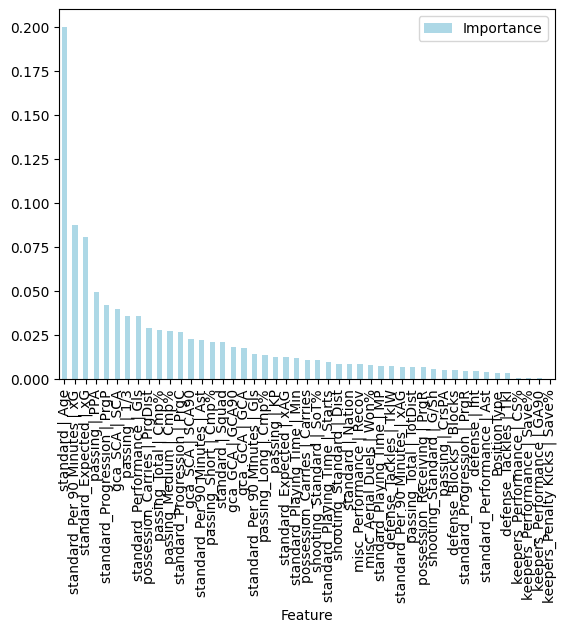

In [61]:
feature_importances = rf_model.feature_importances_

importances_rdf = pd.DataFrame({'Feature':X.columns, 'Importance':feature_importances})

importances_rdf = importances_rdf.sort_values(by='Importance', ascending=False)

importances_rdf.plot(kind = 'bar', x = "Feature" , y = "Importance", color = 'lightblue')